In [2]:
import nibabel as nib
import numpy as np 
import nilearn.plotting as niplt 
import matplotlib.pyplot as plt 
%matplotlib inline
import os 

In [3]:
d="/jukebox/griffiths/bert-brains/results/difference_maps/"
def view_comparison_maps(names,super_name,threshold=0.95,vmax=0):
    
    for name in names:
        fname=d+name 
        t_nii=nib.load(fname+"_"+super_name+"_tvalues.nii.gz")
        affine=t_nii.affine 
        t_volume=t_nii.get_fdata()
        #print(np.sum(t_volume<0))
        if threshold>0:
            p_volume=nib.load(fname+"_"+super_name+"_pvalues.nii.gz").get_fdata()
            t_volume=t_volume*(p_volume>=threshold).astype('int')
        img=nib.Nifti1Image(t_volume,affine)
        if vmax>0:
            niplt.plot_glass_brain(img,title=name,colorbar=True,vmax=vmax,plot_abs=False)
        else:
            niplt.plot_glass_brain(img,title=name,colorbar=True,plot_abs=False)


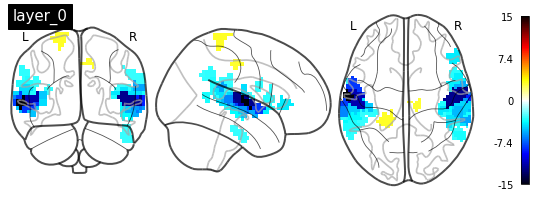

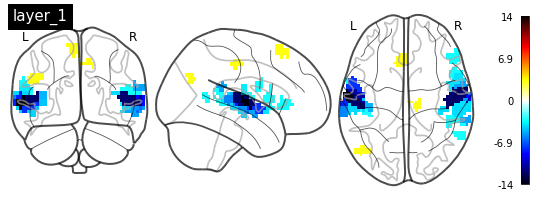

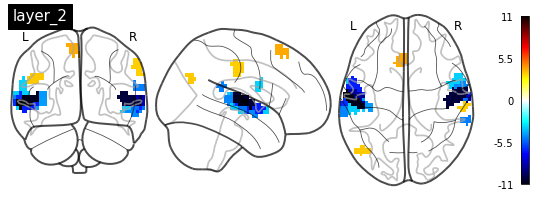

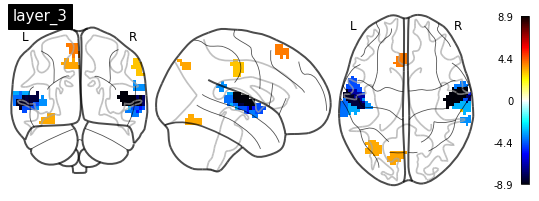

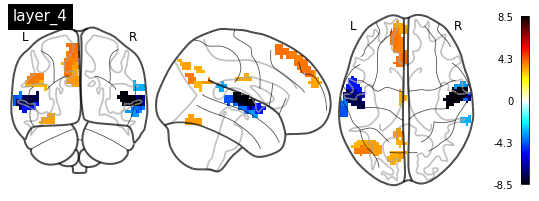

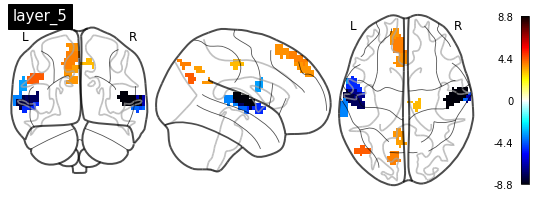

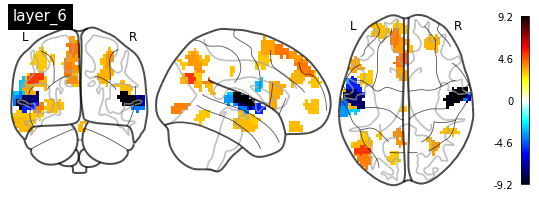

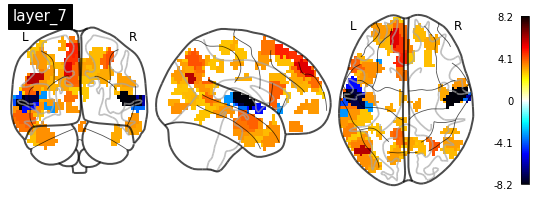

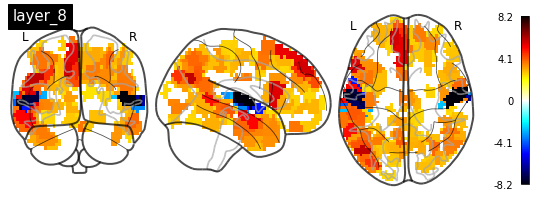

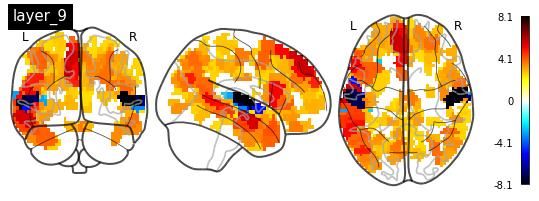

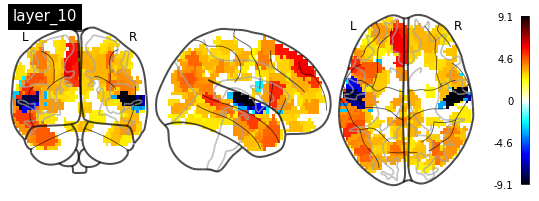

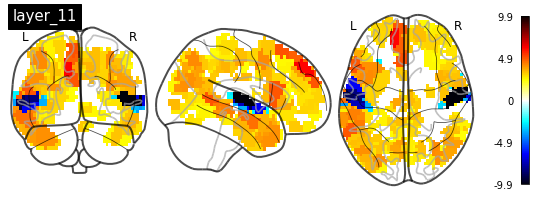

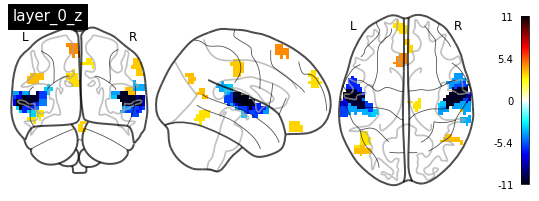

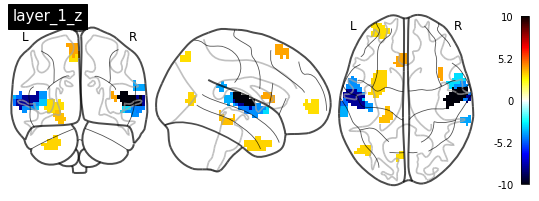

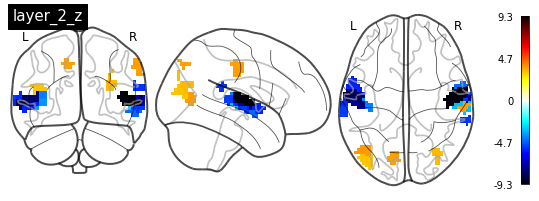

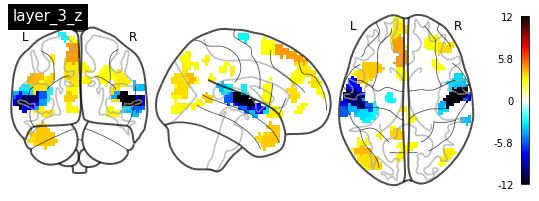

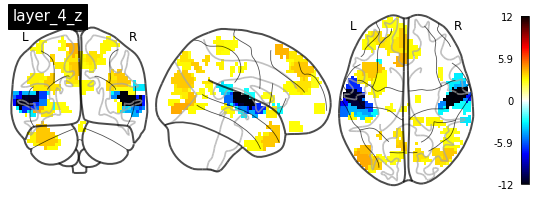

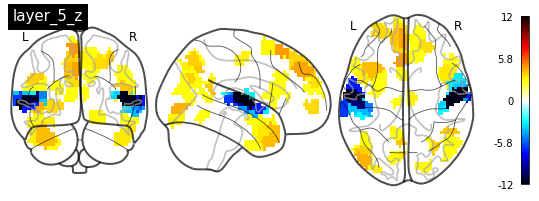

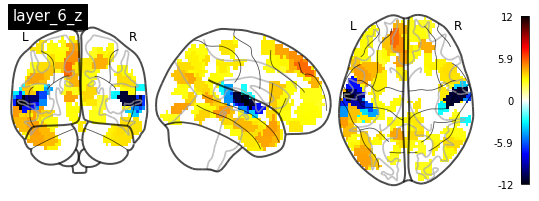

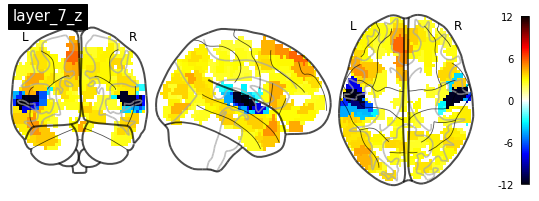

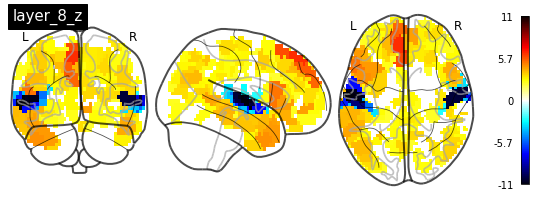

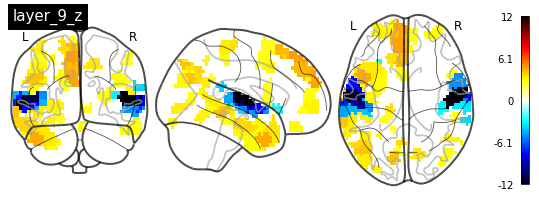

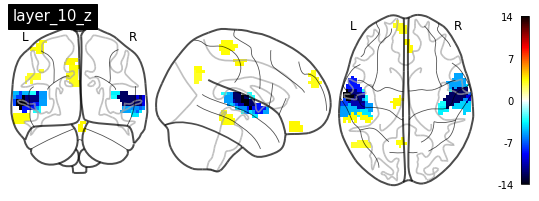

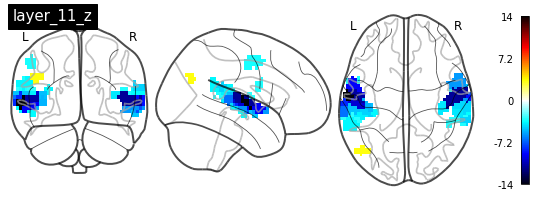

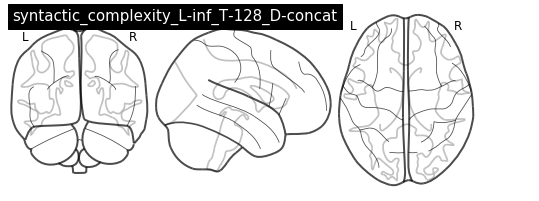

In [4]:
#Combined
names=['layer_'+str(i) for i in range(12)]+['layer_'+str(i)+"_z" for i in range(12)]+['syntactic_complexity_L-inf_T-128_D-concat']

view_comparison_maps(names,'combined')